In [1]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator as ig
from keras import optimizers
import scipy
import pylab
import matplotlib.cm as cm

Using TensorFlow backend.


In [2]:
test=r'C:\Users\mishr\CNN\MODEL\test'
train=r'C:\Users\mishr\CNN\MODEL\train'

In [3]:
#define dimension
input_dime=(150,150,3)
height=150
width=150
batch=28
epoch=3

In [4]:
datagen=ig(rescale=1./255)

In [5]:
train_gen=datagen.flow_from_directory(train,target_size=(width,height),batch_size=9,class_mode="categorical",color_mode='rgb',
                                     shuffle=True)
test_gen=datagen.flow_from_directory(test,target_size=(width,height),batch_size=9,class_mode="categorical",color_mode='rgb',
                                     shuffle=True)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [6]:
m= Sequential(name='GARMENTS')
m.add(Conv2D(16,(3,3),input_shape=input_dime))
m.add(Activation('relu'))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.4))
m.add(Flatten())
m.add(Dense(10, activation='relu',name='layer1'))
m.add(Dropout(0.6))
m.add(Dense(3, activation='softmax',name='layer2'))
print("Summary:--\n",m.summary())
m.compile(loss='CategoricalCrossentropy',optimizer='sgd',metrics='accuracy')

Model: "GARMENTS"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
layer1 (Dense)               (None, 10)                876170    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0  

In [7]:
train_augumented=ig(rescale=1./255,shear_range=0.2,zoom_range=0.3,
                   rotation_range=45,horizontal_flip=True)
train_g_augumented=train_augumented.flow_from_directory(train,target_size=(width,height),batch_size=10,class_mode="categorical",color_mode='rgb',
                                     shuffle=True)


Found 240 images belonging to 3 classes.


In [8]:
results=m.fit(train_gen,epochs=10,validation_data=test_gen,steps_per_epoch=np.floor(train_gen.n//batch))

Epoch 1/10
8/8 [==============================] - 1s 153ms/step - loss: 3.3641 - accuracy: 0.3611 - val_loss: 1.0911 - val_accuracy: 0.3000
Epoch 2/10
8/8 [==============================] - 1s 134ms/step - loss: 1.0575 - accuracy: 0.3913 - val_loss: 1.0930 - val_accuracy: 0.3667
Epoch 3/10
8/8 [==============================] - 1s 132ms/step - loss: 1.0605 - accuracy: 0.4028 - val_loss: 1.0579 - val_accuracy: 0.5500
Epoch 4/10
8/8 [==============================] - 1s 136ms/step - loss: 1.0451 - accuracy: 0.4583 - val_loss: 1.0332 - val_accuracy: 0.5833
Epoch 5/10
8/8 [==============================] - 1s 153ms/step - loss: 1.0567 - accuracy: 0.4306 - val_loss: 1.0243 - val_accuracy: 0.4500
Epoch 6/10
8/8 [==============================] - 1s 128ms/step - loss: 1.0067 - accuracy: 0.4583 - val_loss: 1.0184 - val_accuracy: 0.4333
Epoch 7/10
8/8 [==============================] - 1s 138ms/step - loss: 1.0579 - accuracy: 0.4583 - val_loss: 1.0141 - val_accuracy: 0.4000
Epoch 8/10
8/8 [====

In [9]:
#getting the loss,accuracy,validation_loss and validation accuracy in dict form
res=results.history
res

{'loss': [3.36407732963562,
  1.0574721097946167,
  1.0605465173721313,
  1.0451226234436035,
  1.056728720664978,
  1.0067217350006104,
  1.057945728302002,
  0.9751192927360535,
  0.9950258731842041,
  1.0360913276672363],
 'accuracy': [0.3611111044883728,
  0.3913043439388275,
  0.4027777910232544,
  0.4583333432674408,
  0.4305555522441864,
  0.4583333432674408,
  0.4583333432674408,
  0.5833333134651184,
  0.52173912525177,
  0.52173912525177],
 'val_loss': [1.0911208391189575,
  1.092968225479126,
  1.0579434633255005,
  1.0331631898880005,
  1.024281620979309,
  1.0183507204055786,
  1.0140748023986816,
  1.0302150249481201,
  1.028939962387085,
  0.992320716381073],
 'val_accuracy': [0.30000001192092896,
  0.36666667461395264,
  0.550000011920929,
  0.5833333134651184,
  0.44999998807907104,
  0.4333333373069763,
  0.4000000059604645,
  0.38333332538604736,
  0.36666667461395264,
  0.44999998807907104]}

In [10]:
loss=res['loss']
acc=res['accuracy']
valid_loss=res['val_loss']
val_acu=res['val_accuracy']
epoch=range(1,len(val_acu)+1)

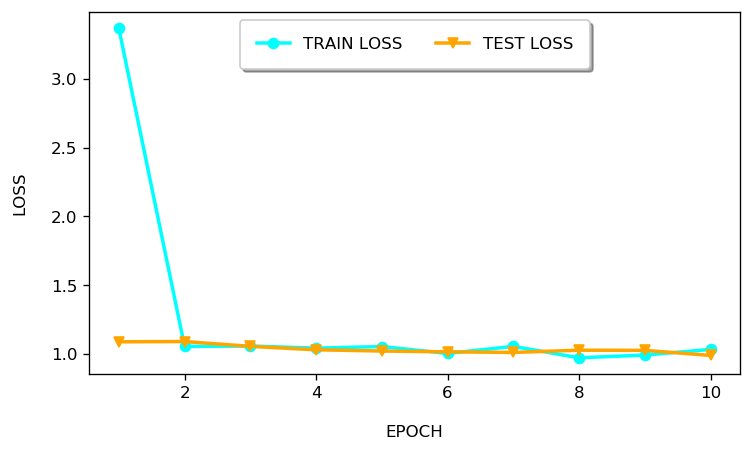

In [11]:
#PLOTTING LOSS VALUES
plt.figure(figsize=(7,4),dpi=120)
l1=plt.plot(epoch,loss,label="TRAIN LOSS")
l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

plt.setp(l1,color='cyan',marker="o",linewidth=2.1)
plt.setp(l2,color='orange',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('LOSS\n')
plt.legend(loc='upper center', ncol=2,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

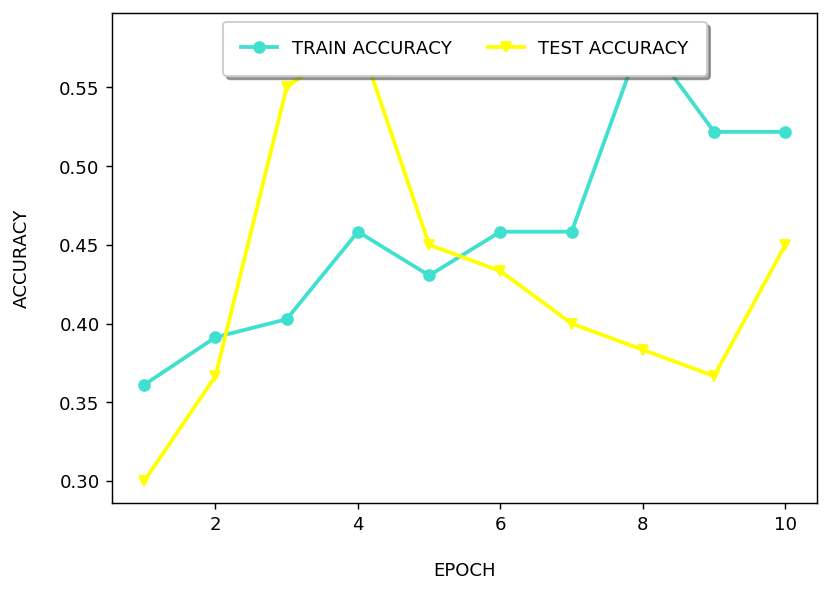

In [12]:
#PLOTTING ACCURACY VALUES
plt.figure(figsize=(7,5),dpi=130)
l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

plt.setp(l1,color='turquoise',marker="o",linewidth=2.1)
plt.setp(l2,color='yellow',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('ACCURACY\n')
plt.legend(loc='upper center', ncol=2,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

In [14]:
#saving the model
m.save("AMAZON_PRODUCTS_CNN.h5")